In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
projects = [
    "guava",
    "jackson",
    "junit4",
    "lombok",
    "mockito",
    "netty"#,
    #'tradehub'
]

In [3]:
def readProjectData(projectName, generation):
    with open(f"../results/{generation}/{projectName}.json") as f:
        data = json.load(f)
        data.pop("commitsSize")
        return data

def getPropertyPlotData(projectData, evaluation, propertyName):
    x, y = [], []
    
    for key, value in projectData.items():
        y_value = value[evaluation][propertyName]
        if y_value == 'NaN': continue
        
        x.append(key)
        y.append(y_value)
    
    return x, y

In [4]:
def plotNavigation(generation):
    evaluation = "navigation"
    figure = plt.figure(figsize=(15, 7))

    axPrecision = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=figure)
    axFairPrecision = plt.subplot2grid((2,6), (0,2), colspan=2)
    axRecall = plt.subplot2grid((2,6), (0,4), colspan=2)
    axFairRecall = plt.subplot2grid((2,6), (1,1), colspan=2)
    axCorrectInTop = plt.subplot2grid((2,6), (1,3), colspan=2)
    
    axPrecision.set_title("Precision")
    axFairPrecision.set_title("Fair precision")
    axRecall.set_title("Recall")
    axFairRecall.set_title("Fair recall")
    axCorrectInTop.set_title("Correct in top")
    
    for project in projects:
        data = readProjectData(project, generation)
        
        axPrecision.plot(*getPropertyPlotData(data, evaluation, "precision"), label=project)
        axFairPrecision.plot(*getPropertyPlotData(data, evaluation, "fairPrecision"), label=project)
        axRecall.plot(*getPropertyPlotData(data, evaluation, "recall"), label=project)
        axFairRecall.plot(*getPropertyPlotData(data, evaluation, "fairRecall"), label=project)
        axCorrectInTop.plot(*getPropertyPlotData(data, evaluation, "fairCorrectInTop"), label=project)
        
    axPrecision.legend()
    axFairPrecision.legend()
    axRecall.legend()
    axFairRecall.legend()
    axCorrectInTop.legend()
    
    figure.tight_layout()
    
    
def plotPrevention(generation):
    evaluation = "prevention"
    figure = plt.figure(figsize=(15, 10))
        
    axPrecision = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=figure)
    axFairPrecision = plt.subplot2grid((2,6), (0,2), colspan=2)
    axRecall = plt.subplot2grid((2,6), (0,4), colspan=2)
    
    axPrecision.set_title("Precision")
    axFairPrecision.set_title("Fair precision")
    axRecall.set_title("Recall")
    
    for project in projects:
        data = readProjectData(project, generation)
        
        axPrecision.plot(*getPropertyPlotData(data, evaluation, "precision"), label=project)
        axFairPrecision.plot(*getPropertyPlotData(data, evaluation, "fairPrecision"), label=project)
        axRecall.plot(*getPropertyPlotData(data, evaluation, "recall"), label=project)
        
    axPrecision.legend()
    axFairPrecision.legend()
    axRecall.legend()
    
    figure.tight_layout()
    

def plotFalseAlarm(generation):
    evaluation = "falseAlarm"
    figure = plt.figure(figsize=(15, 10))
        
    axPrecision = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=figure)
    axPrecision.set_title("Precision")
    
    for project in projects:
        data = readProjectData(project, generation)
        axPrecision.plot(*getPropertyPlotData(data, evaluation, "precision"), label=project)
        
    axPrecision.legend()
    
    figure.tight_layout()

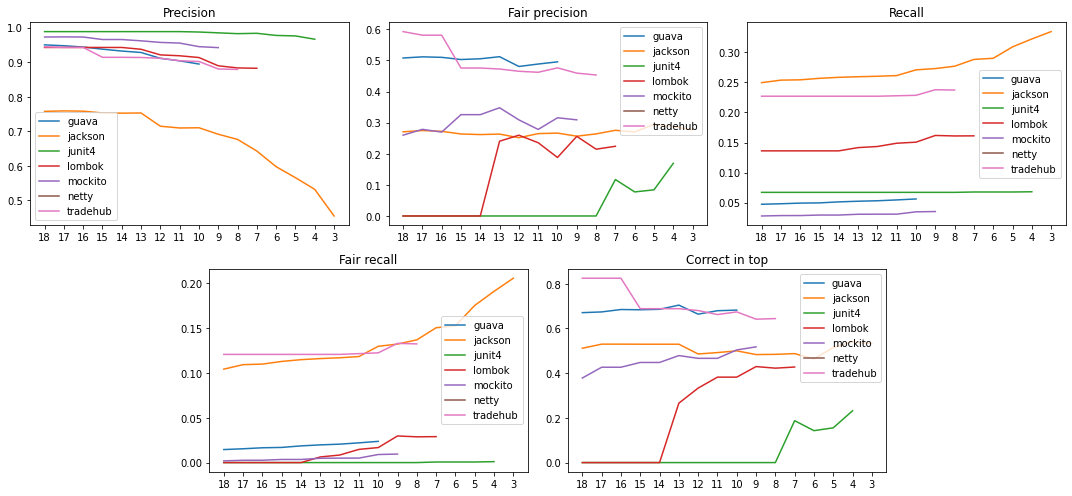

In [6]:
plotNavigation('gen1_00_90')

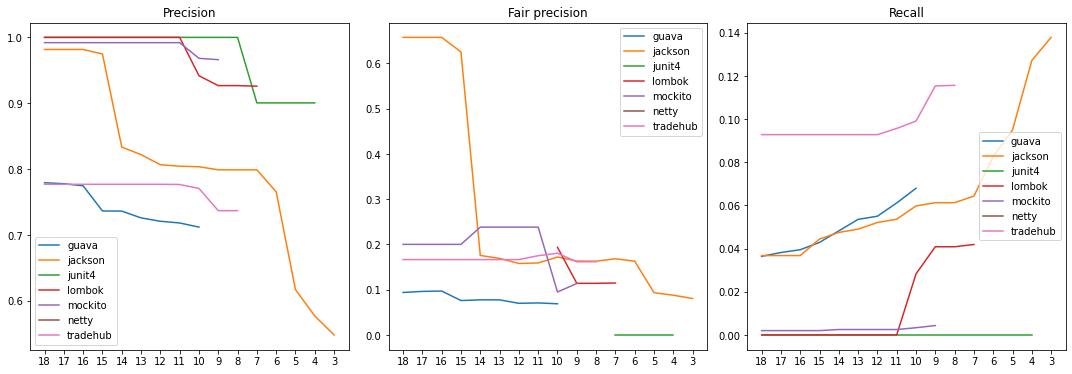

In [7]:
plotPrevention('gen1_00_90')

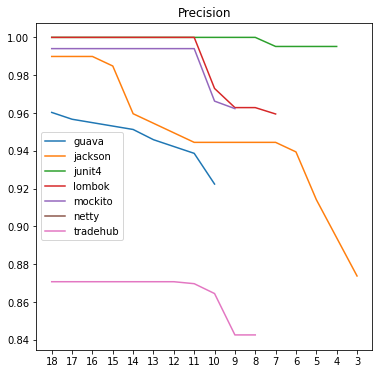

In [8]:
plotFalseAlarm('gen1_00_90')

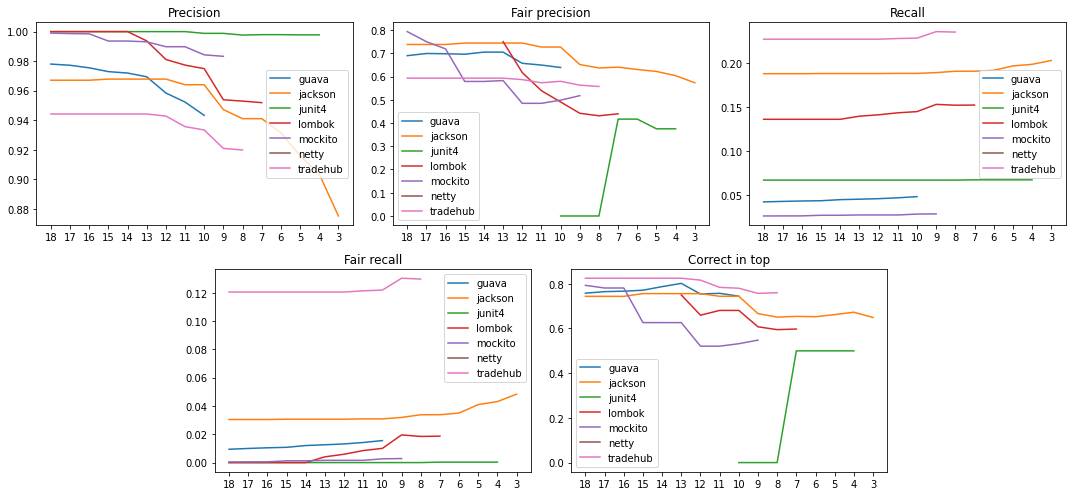

In [10]:
plotNavigation('gen2_50_95')

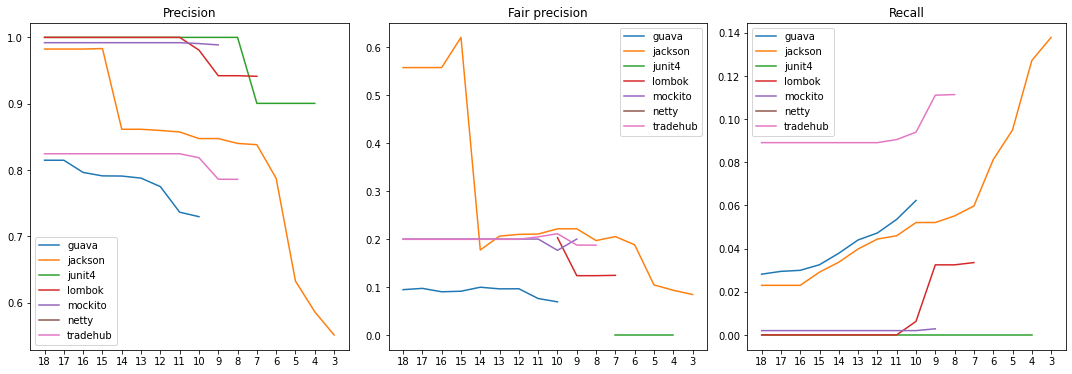

In [11]:
plotPrevention('gen2_50_95')

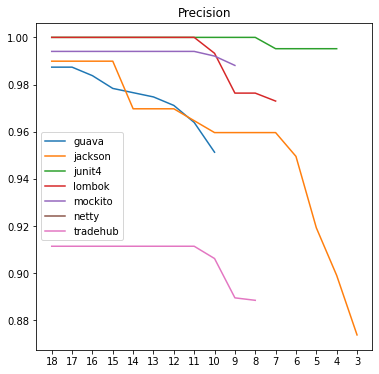

In [12]:
plotFalseAlarm('gen2_50_95')

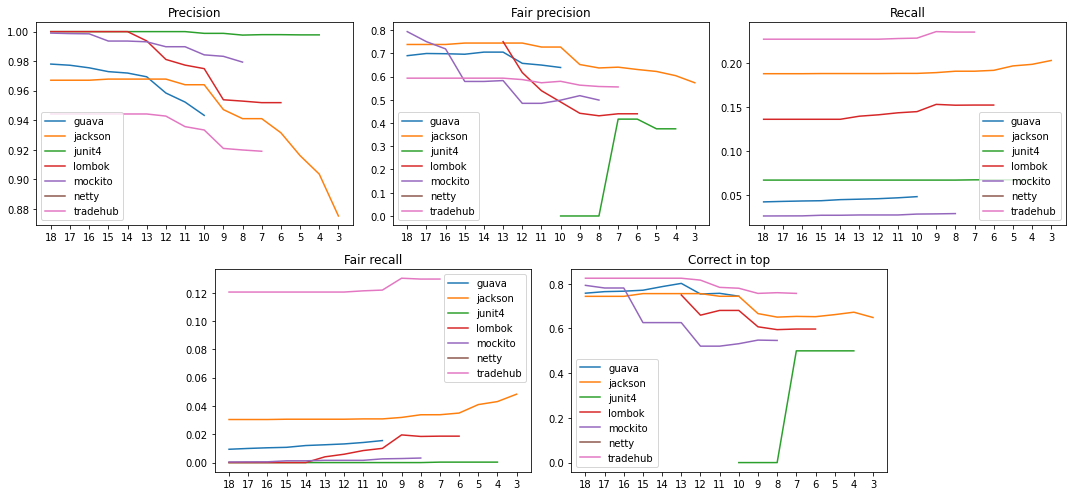

In [13]:
plotNavigation('gen3_max8')

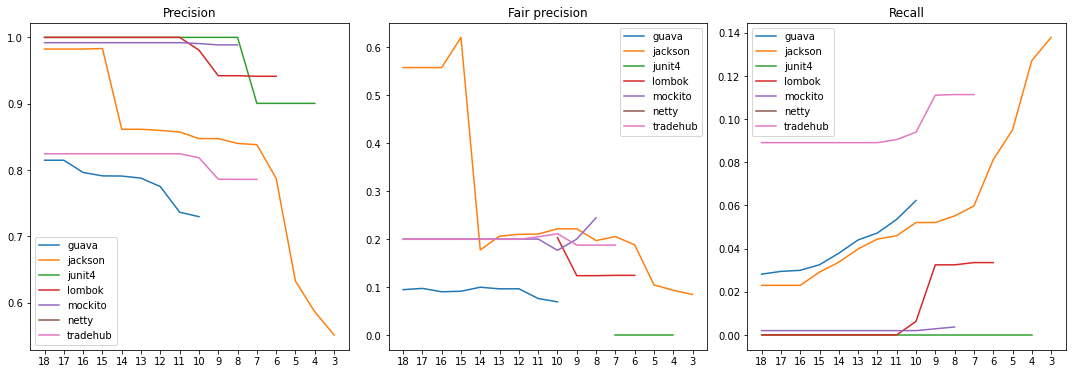

In [14]:
plotPrevention('gen3_max8')

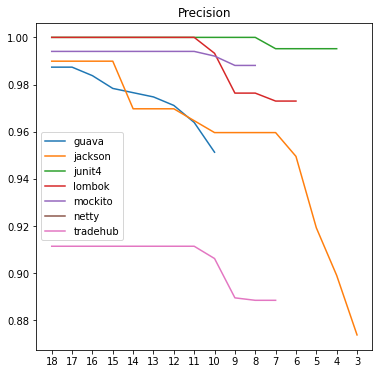

In [15]:
plotFalseAlarm('gen3_max8')

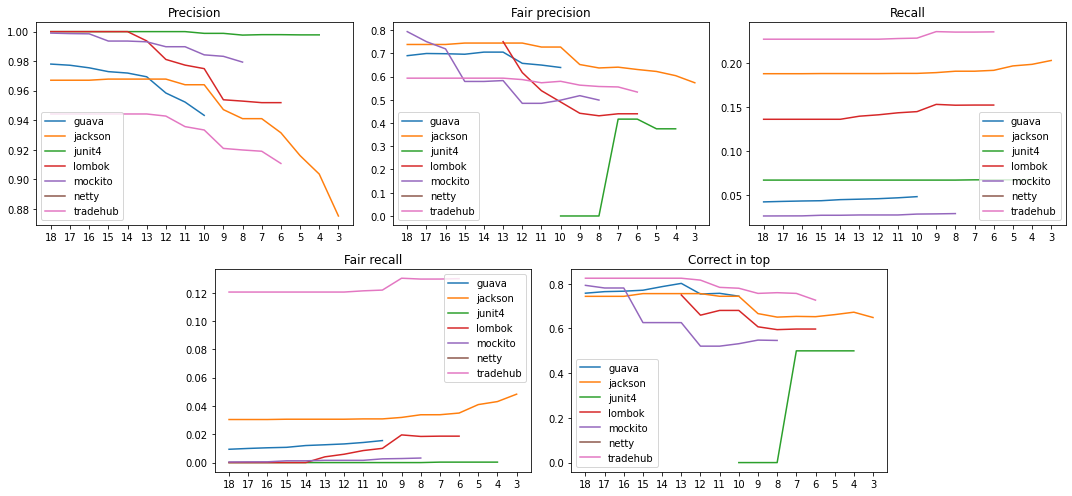

In [16]:
plotNavigation('gen3_max5')

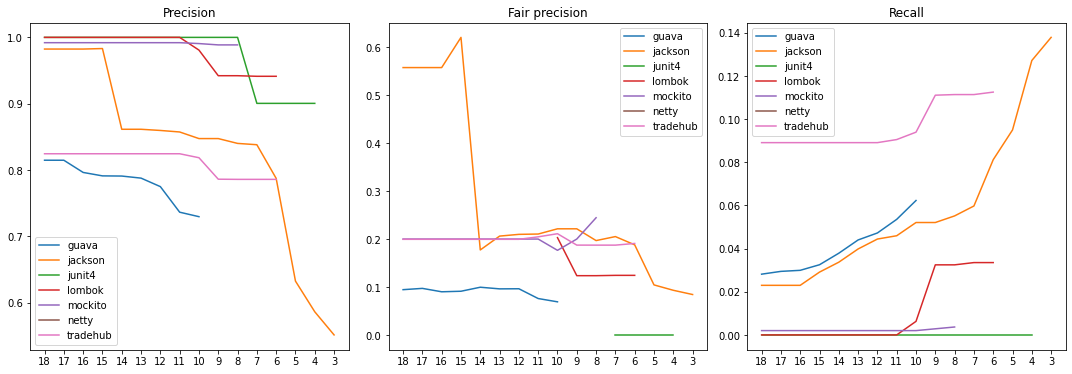

In [17]:
plotPrevention('gen3_max5')

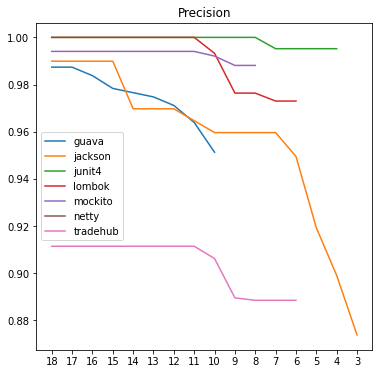

In [18]:
plotFalseAlarm('gen3_max5')

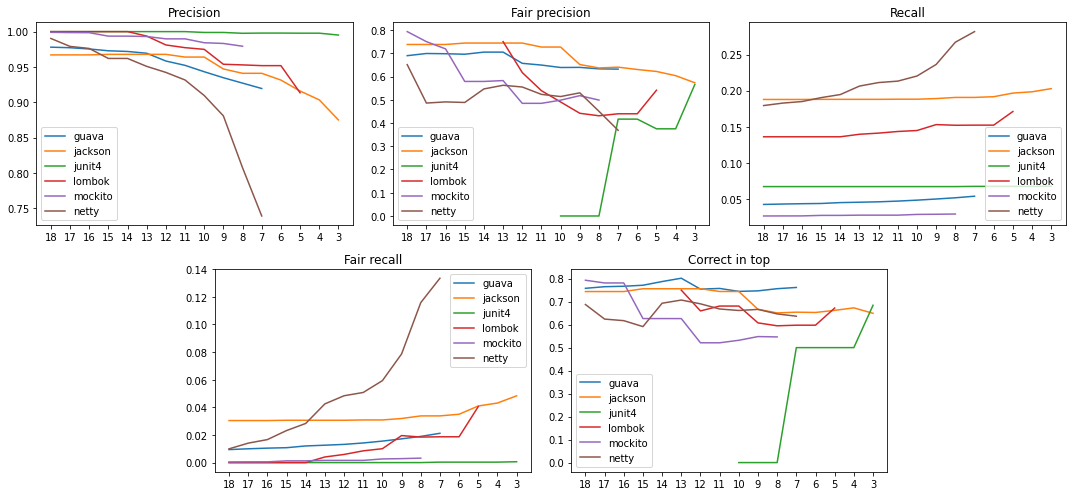

In [5]:
plotNavigation('gen5_max5_30s')

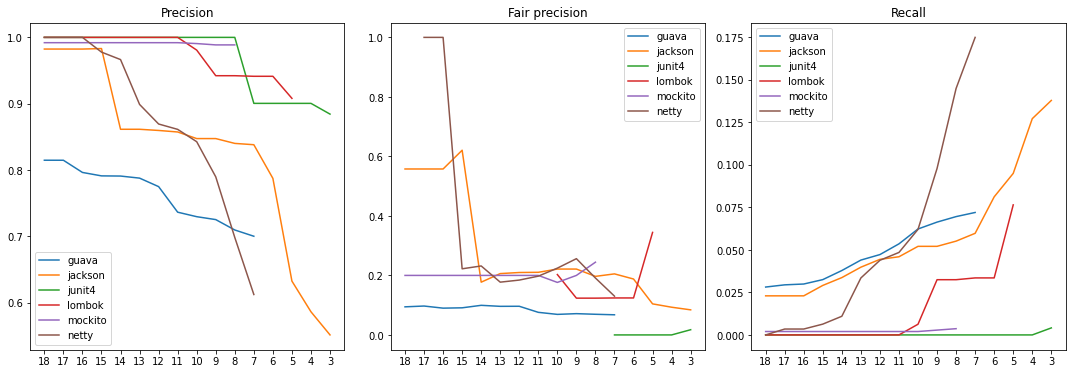

In [6]:
plotPrevention('gen5_max5_30s')

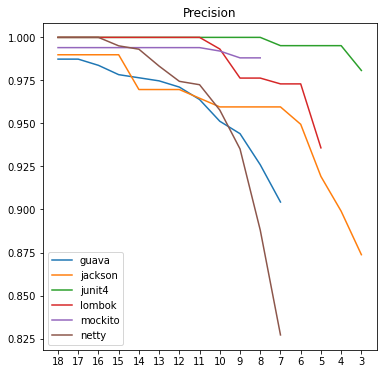

In [7]:
plotFalseAlarm('gen5_max5_30s')